In [11]:
# Module
import pandas as pd
import numpy as np
import os
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from plotnine import *

In [12]:
# Setting Warning MSG
warnings.filterwarnings(action = 'ignore')

# Setting DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.options.display.float_format = '{:,.0f}'.format

# Setting Font
mpl.rcParams['axes.unicode_minus'] = False

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf') 
nanum_font_list = [_ for _ in font_list if 'Nanum' in _]
font_path = nanum_font_list[0]

fontprop = fm.FontProperties(fname=font_path, size=12)

In [13]:
# Load Data
os.listdir('./../Input_data')
input_data = os.listdir('./../Input_data')[-1]
df = pd.read_csv(f'./../Input_data/{input_data}', encoding='cp949', skiprows=1, header=0)

# Check Data
df.shape
df.head()
df.info()

year = df.iloc[0]
month = df.iloc[1]

# Data Purification
print(year)
for idx, y in enumerate(year):
    if 2 < idx < 15:
        year[idx] = f'2014년 {month[idx]}'
    elif idx >= 15:
        year[idx] = f'2015년 {month[idx]}'
    elif idx == 2:
        year[idx] = f'{year[idx]} {month[idx]}'
    elif idx == 1:
        year[idx] = '시군구'
        
df.columns = year

df = df.drop(df.index[[0,1]])

df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')
df['지역'] = df['구분'] + df['시군구']

print(df['지역'])

melt_columns = df.columns.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9 non-null      object
 1   Unnamed: 1   15 non-null     object
 2   Unnamed: 2   23 non-null     object
 3   Unnamed: 3   23 non-null     object
 4   Unnamed: 4   22 non-null     object
 5   Unnamed: 5   22 non-null     object
 6   Unnamed: 6   22 non-null     object
 7   Unnamed: 7   22 non-null     object
 8   Unnamed: 8   22 non-null     object
 9   Unnamed: 9   22 non-null     object
 10  Unnamed: 10  22 non-null     object
 11  Unnamed: 11  22 non-null     object
 12  Unnamed: 12  22 non-null     object
 13  Unnamed: 13  22 non-null     object
 14  Unnamed: 14  22 non-null     object
 15  Unnamed: 15  23 non-null     object
 16  Unnamed: 16  22 non-null     object
 17  Unnamed: 17  22 non-null     object
 18  Unnamed: 18  22 non-null     object
 19  Unnamed: 19  22 non-null     ob

In [14]:
# New DataFrame
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=melt_columns[2:-4])
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

df_2013_2015['지역'].value_counts()
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())
df_2013_2015.head()

df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

df_2013_2015.info()

try:
    df_2013_2015['분양가격'] = df_2013_2015['분양가'].astype(int)
except:
    df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
dtypes: object(5)
memory usage: 18.2+ KB


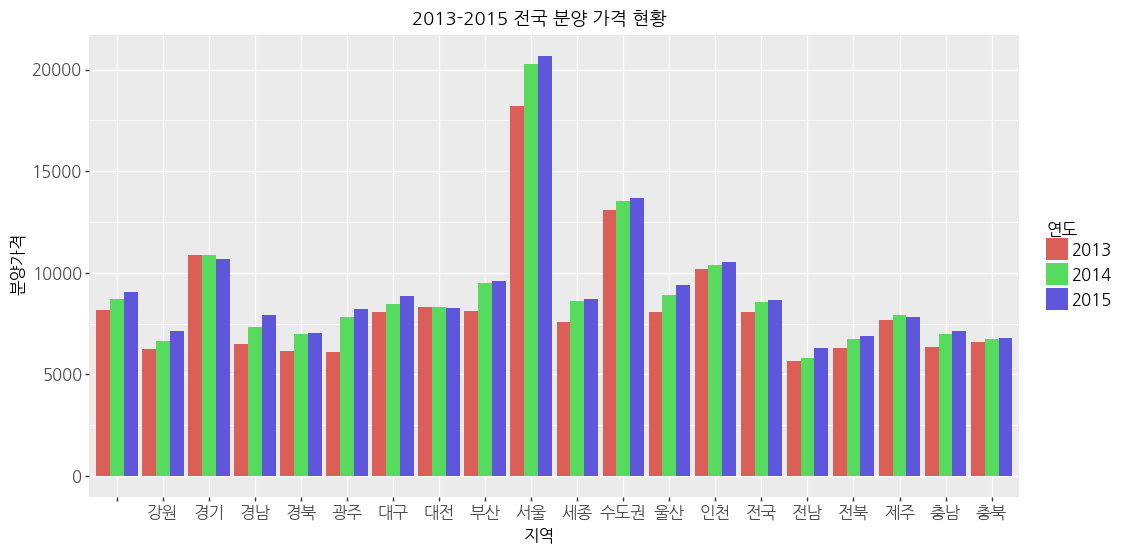

<ggplot: (141737112022)>

In [15]:
# 전국 분양 가격 현황 시각화 ; BarPlot
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2013-2015 전국 분양 가격 현황')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(12, 6))
)

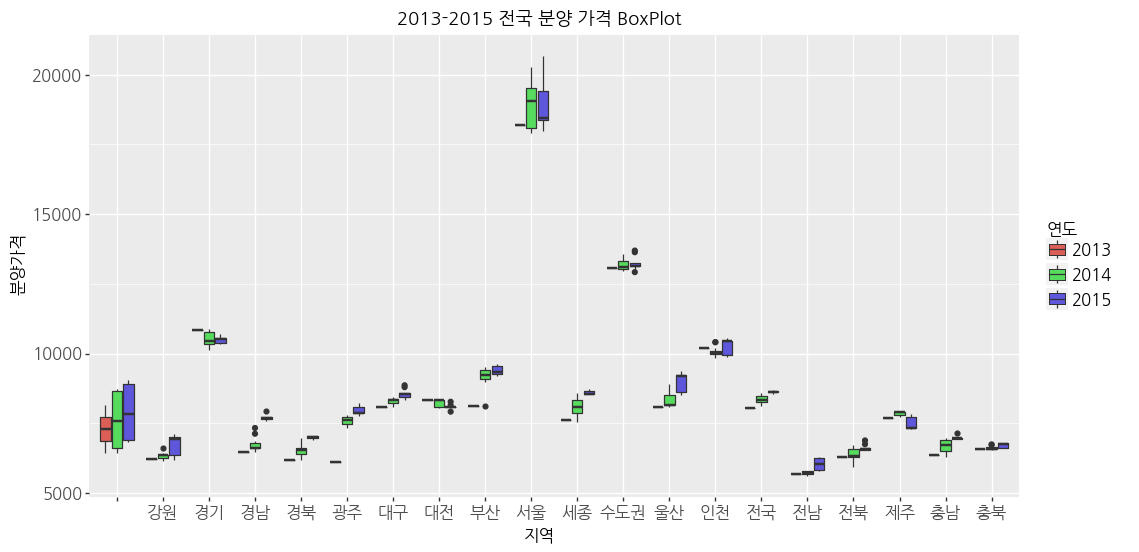

<ggplot: (141737193096)>

In [16]:
# 전국 분양 가격 이상치 시각화 ; BoxPlot
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + ggtitle('2013-2015 전국 분양 가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(12, 6))
)

In [ ]:
# To CSV
df_to_csv = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_to_csv.columns = ['지역명', '연도', '월', '평당분양가격']
df_to_csv.to_csv('2013-2015.csv', index=False)